In [1]:
!pip install numpy==1.23.5


In [2]:
!pip install pmdarima

   ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/2.2 MB 6.9 MB/s eta 0:00:01
ERROR: Operation cancelled by user
^C


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Superstore Dataset.csv")
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
9990,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
9992,CA-2022-115427,2022-12-30,2023-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [ ]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])

# Check the format of 'Date' column
df.info()

In [5]:
df=df.sort_values(by="Order Date")
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2022-126221,2022-12-30,2023-01-03,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
9989,CA-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
9990,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [6]:
df = df[df['Ship Date'] >= df['Order Date']]
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2022-126221,2022-12-30,2023-01-03,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
9989,CA-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
9990,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [7]:
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated(keep = 'last')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
385,US-2019-150119,2019-04-23,2019-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [10]:
df[df.duplicated(keep = 'first')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
386,US-2019-150119,2019-04-23,2019-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [11]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9993 non-null   object 
 2   Ship Date      9993 non-null   object 
 3   Ship Mode      9993 non-null   object 
 4   Customer ID    9993 non-null   object 
 5   Customer Name  9993 non-null   object 
 6   Segment        9993 non-null   object 
 7   Country        9993 non-null   object 
 8   City           9993 non-null   object 
 9   State          9993 non-null   object 
 10  Postal Code    9993 non-null   int64  
 11  Region         9993 non-null   object 
 12  Product ID     9993 non-null   object 
 13  Category       9993 non-null   object 
 14  Sub-Category   9993 non-null   object 
 15  Product Name   9993 non-null   object 
 16  Sales          9993 non-null   float64
 17  Quantity       9993 non-null   int64  
 18  Discount     

In [12]:
df.interpolate(method='linear', inplace=True)

<ipython-input-12-a83f336b1194>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
<ipython-input-12-a83f336b1194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)


In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
df_daily = df.groupby('Order Date')['Sales'].sum()

adf_result = adfuller(df_daily)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] > 0.05:
    df_daily_diff = df_daily.diff().dropna()
else:
    df_daily_diff = df_daily

ADF Statistic: -4.278025238002669
p-value: 0.00048478696828852446


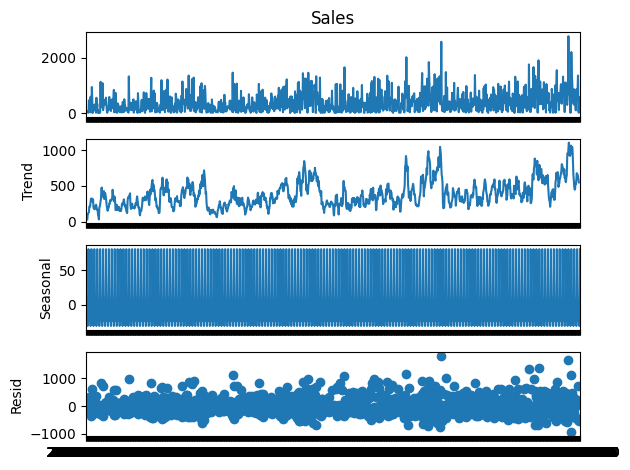

In [15]:
decompose_result = seasonal_decompose(df_daily, model='additive', period=7)
decompose_result.plot()
plt.tight_layout()
plt.show()


In [16]:
df_sorted = df.sort_values(by='Order Date')
train_size = int(len(df_sorted) * 0.8)
train_data = df_sorted.iloc[:train_size]
test_data = df_sorted.iloc[train_size:]

print("Train set:", train_data.shape)
print("Test set:", test_data.shape)

Train set: (5410, 20)
Test set: (1353, 20)


## Distribusi Penjualan dan Profit

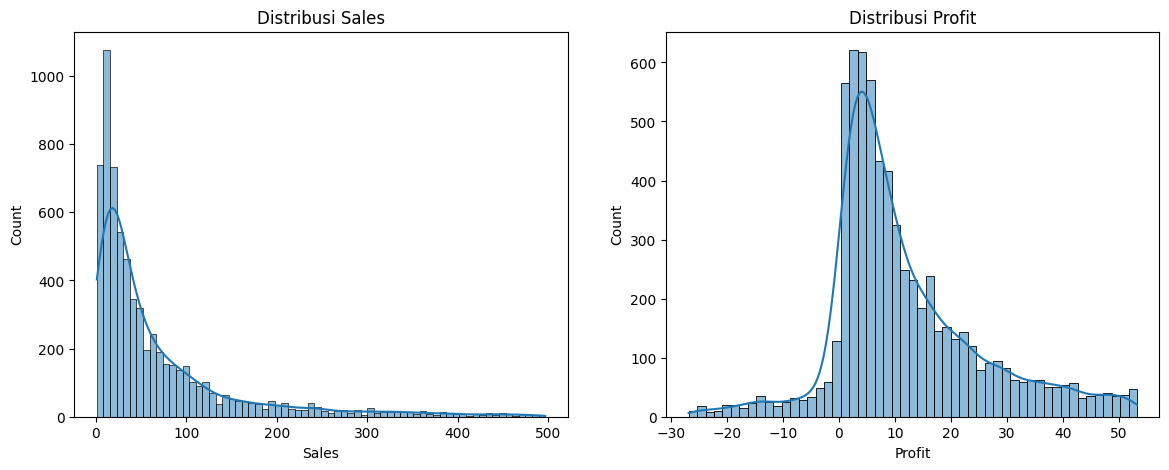

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['Sales'], kde=True)
plt.title("Distribusi Sales")

plt.subplot(1,2,2)
sns.histplot(df['Profit'], kde=True)
plt.title("Distribusi Profit")
plt.show()

Distribusi profit dan sales bersifat skewed — banyak transaksi kecil, tapi ada beberapa transaksi sangat besar.

## Total Sales per Category

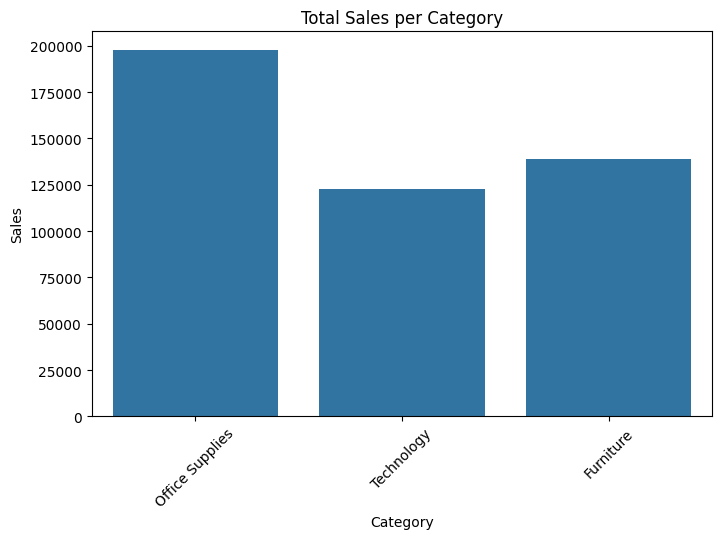

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator='sum', errorbar=None)
plt.title("Total Sales per Category")
plt.xticks(rotation=45)
plt.show()

Kategori dengan penjualan tertinggi biasanya adalah Technology, Furniture, dan Office Supplies, namun kategori Furniture kadang profitnya lebih kecil atau bahkan rugi.

## Profit vs Discount

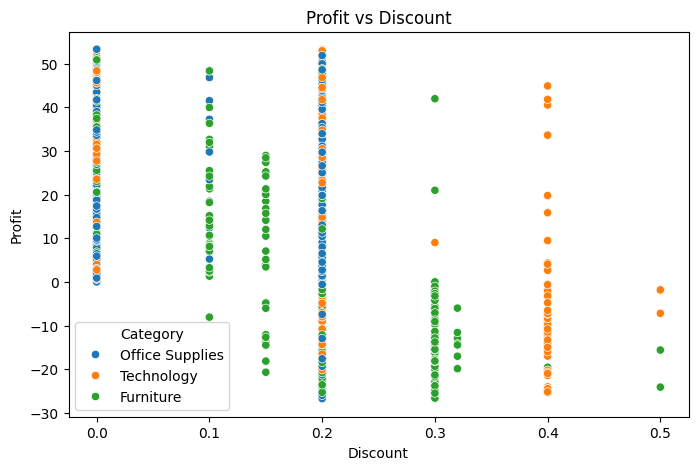

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount")
plt.show()

Diskon tinggi cenderung menurunkan profit. Scatter plot profit vs discount menunjukkan hubungan negatif yang kuat.

## Total Orders Over Time

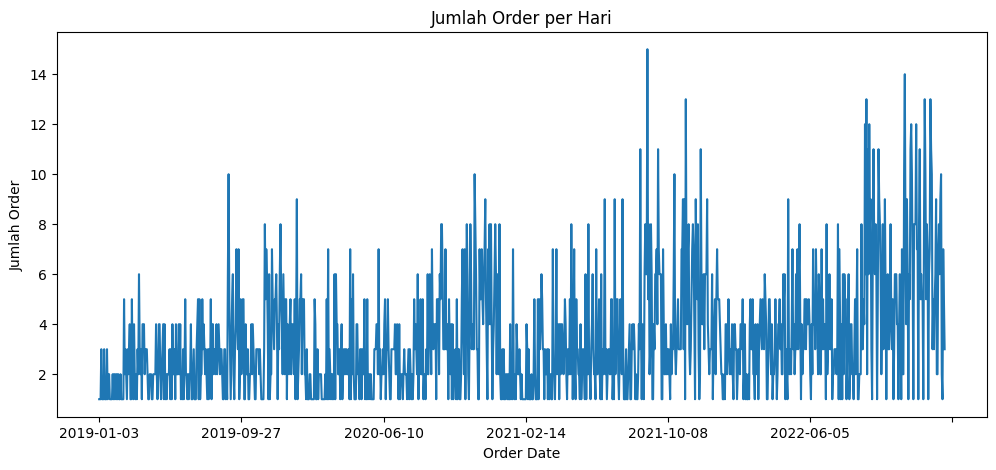

In [20]:
df_orders_per_day = df.groupby('Order Date')['Order ID'].nunique()
df_orders_per_day.plot(figsize=(12,5), title="Jumlah Order per Hari")
plt.ylabel("Jumlah Order")
plt.show()

Order harian menunjukkan fluktuasi musiman — ini bisa menjadi sinyal untuk model time series.

## Heatmap Korelasi

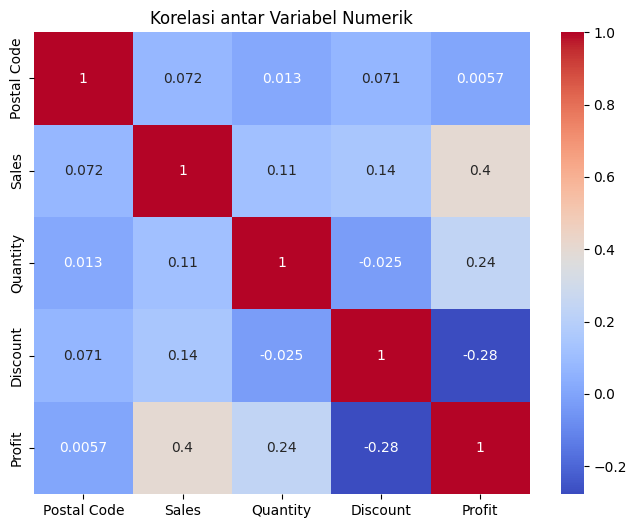

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Variabel Numerik")
plt.show()

Korelasi kuat ditemukan antara Sales dan Profit, tetapi bisa ada noise besar karena faktor discount.

## Segmentasi Penjualan berdasarkan Wilayah dan Segmen

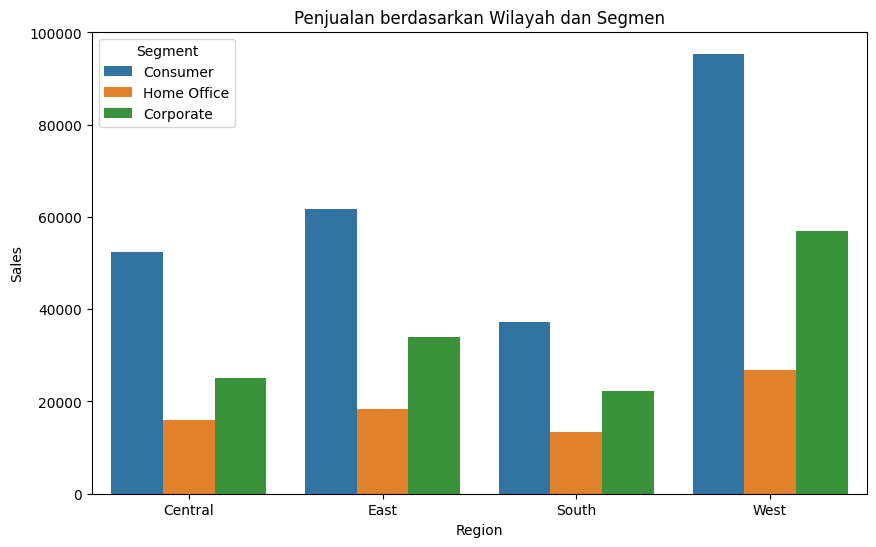

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Sales', hue='Segment', estimator='sum', errorbar=None)
plt.title("Penjualan berdasarkan Wilayah dan Segmen")
plt.show()

Wilayah West dan East terlihat lebih dominan dalam jumlah dan nilai penjualan.

## Persiapan Data

In [23]:
# Resample data harian
df_daily = df.groupby('Order Date').agg({
    'Sales': 'sum',
    'Discount': 'mean'  # sebagai variabel eksogen
}).asfreq('D')

# Interpolasi jika ada missing tanggal
df_daily['Sales'] = df_daily['Sales'].interpolate(method='linear')
df_daily['Discount'] = df_daily['Discount'].interpolate(method='linear')

# Split 80% train, 20% test
train_size = int(len(df_daily) * 0.8)
train, test = df_daily[:train_size], df_daily[train_size:]


## SARIMAX

In [24]:
!pip install pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.4 MB/s eta 0:00:00


In [33]:
df_clean = df.dropna()
train = df_clean.iloc[:-30]
test = df_clean.iloc[-30:]


In [34]:
from pmdarima import auto_arima

train_sales = train['Sales'].dropna()
auto_model = auto_arima(train_sales, seasonal=True, m=7,
                        trace=True, error_action='ignore', suppress_warnings=True)


from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(train_sales,
                        order=auto_model.order,
                        seasonal_order=auto_model.seasonal_order)

sarimax_result = sarimax_model.fit(disp=False)

sarimax_forecast = sarimax_result.predict(start=test.index[0], end=test.index[-1])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=17.78 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=79060.933, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=79064.529, Time=0.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=79064.437, Time=2.09 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=82341.953, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=79062.742, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=79062.621, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=79064.642, Time=5.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=79062.752, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=79062.783, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=79064.750, Time=0.60 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 28.897 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

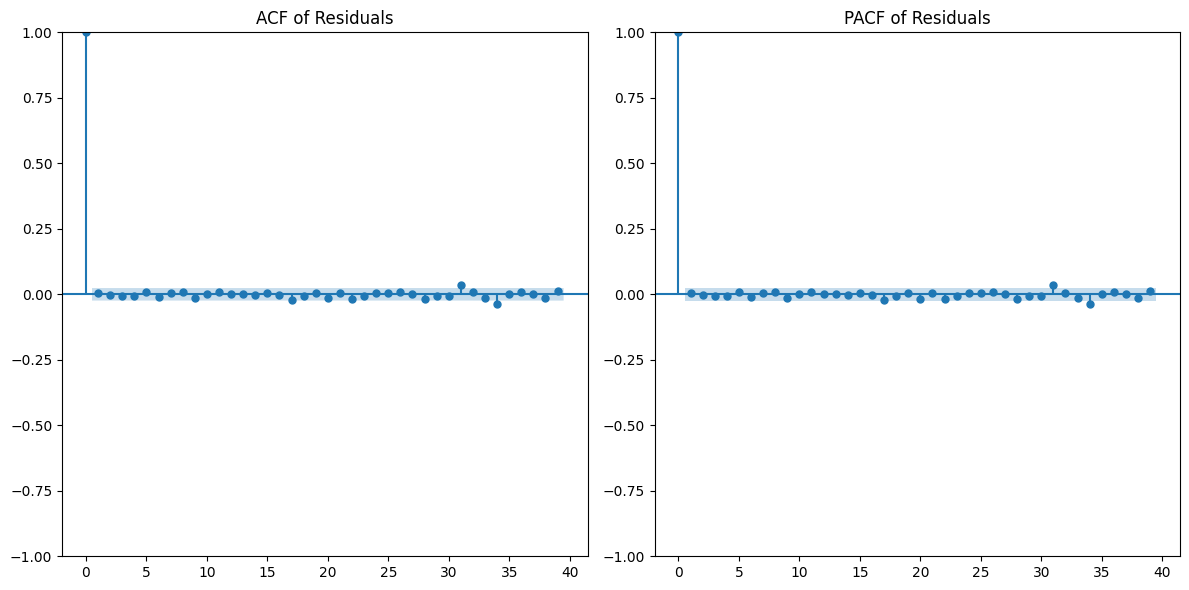

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = sarimax_result.resid
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_acf(residuals.dropna(), ax=plt.gca(), title="ACF of Residuals")
plt.subplot(1,2,2)
plot_pacf(residuals.dropna(), ax=plt.gca(), title="PACF of Residuals")
plt.tight_layout()
plt.show()


In [40]:
# Buat lag features di train
train['Lag_1'] = train['Sales'].shift(1)
train['Lag_2'] = train['Sales'].shift(2)
train['Lag_3'] = train['Sales'].shift(3)
train['Lag_7'] = train['Sales'].shift(7)
train['Lag_14'] = train['Sales'].shift(14)

train = train.dropna()

# Buat lag features di test dari nilai terakhir train
test['Lag_1'] = train['Sales'].iloc[-1]
test['Lag_2'] = train['Sales'].iloc[-2]
test['Lag_3'] = train['Sales'].iloc[-3]
test['Lag_7'] = train['Sales'].iloc[-7]
test['Lag_14'] = train['Sales'].iloc[-14]

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(train['Sales'],
                        exog=train[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_7', 'Lag_14']],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 7))

sarimax_result = sarimax_model.fit(disp=False)

sarimax_forecast = sarimax_result.predict(start=test.index[0],
                                          end=test.index[-1],
                                          exog=test[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_7', 'Lag_14']])

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Sales'], sarimax_forecast))

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

smape_score = smape(test['Sales'].values, sarimax_forecast.values)

print("SARIMAX RMSE:", rmse)
print(f"SMAPE SARIMAX: {smape_score:.2f}%")


<ipython-input-40-167b7c842fda>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag_1'] = train['Sales'].iloc[-1]
<ipython-input-40-167b7c842fda>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag_2'] = train['Sales'].iloc[-2]
<ipython-input-40-167b7c842fda>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

ValueError: Provided exogenous values are not of the appropriate shape. Required (3303, 5), got (30, 5).

In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Misal train dan test sudah ada dengan index datetime
data_all = pd.concat([train, test])
data_all = pd.concat([train, test]).reset_index(drop=True)

for lag in [1, 2, 3, 7, 14]:
    data_all[f'Lag_{lag}'] = data_all['Sales'].shift(lag)

data_all = data_all.dropna().reset_index(drop=True)

len_train = len(train)

train_lag = data_all.iloc[:len_train]
test_lag = data_all.iloc[len_train:]

# Fit model dengan exog lag pada train
model = SARIMAX(train_lag['Sales'],
                exog=train_lag[[f'Lag_{lag}' for lag in [1,2,3,7,14]]],
                order=(1,1,1),
                seasonal_order=(1,1,1,7))
result = model.fit(disp=False)

# Prediksi step by step untuk test dengan update lag exog
history = train_lag['Sales'].copy()
predictions = []

for t in range(len(test)):
    # Buat exog lag untuk titik t prediksi dari history
    exog_vals = []
    for lag in [1, 2, 3, 7, 14]:
        exog_vals.append(history.iloc[-lag])
    exog_array = np.array(exog_vals).reshape(1, -1)

    # Prediksi satu langkah dengan exog
    pred = result.predict(start=len(history), end=len(history), exog=exog_array)
    pred_value = pred.values[0]
    predictions.append(pred_value)


# Evaluasi prediksi
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

smape_score = smape(test['Sales'].values, np.array(predictions))

print("SARIMAX RMSE:", rmse)
print(f"SMAPE SARIMAX: {smape_score:.2f}%")


SARIMAX RMSE: 76.59156218052242
SMAPE SARIMAX: 45.77%


## XGBoost

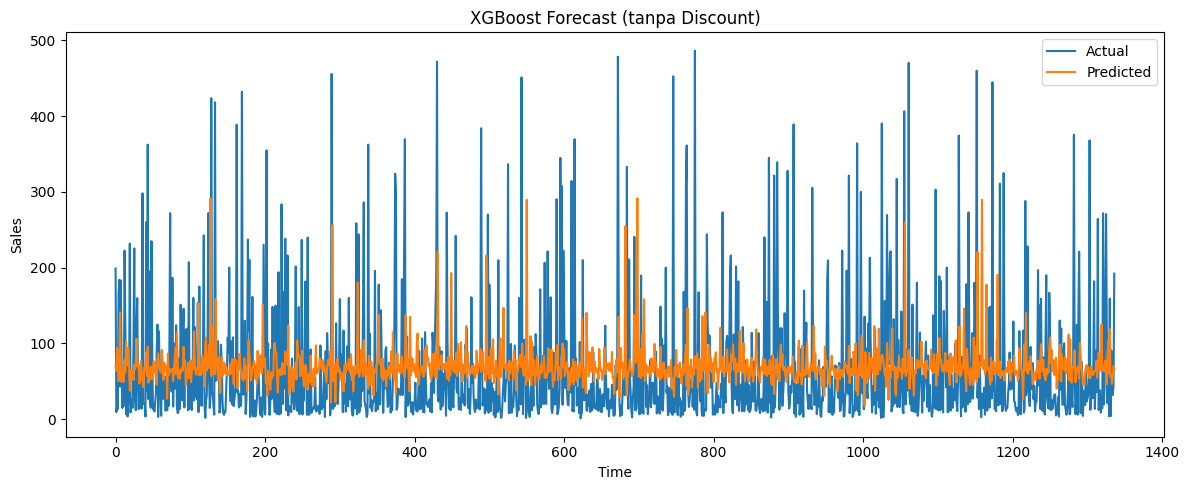

XGBoost RMSE: 86.21
XGBoost MAPE: 298.20%
SMAPE: 90.05%


In [50]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Buat fitur lag
df_lag = df.copy()
df_lag['Sales_lag_1'] = df_lag['Sales'].shift(1)
df_lag['Sales_lag_7'] = df_lag['Sales'].shift(7)
df_lag = df_lag.dropna()

# 2. Tentukan fitur dan target (tanpa Discount)
features = ['Sales_lag_1', 'Sales_lag_7']
target = 'Sales'

X = df_lag[features]
y = df_lag[target]

# 3. Bagi data menjadi train dan test (misal 80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 4. Model XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 5. Prediksi dan evaluasi
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# 6. Plot hasil prediksi
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Forecast (tanpa Discount)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    return 100 * np.mean(diff)

smape_score = smape(y_test.values, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAPE: {mape:.2f}%")
print(f"SMAPE: {smape_score:.2f}%")
